## Análise de popularidade
Quais são as características em comum que destacam os animes mais populares?

In [2]:
import pandas as pd
import numpy as np

In [3]:
users = pd.read_csv('manipulated_data/users_age_location.csv')
animes = pd.read_csv('myanimelist/anime_cleaned.csv')
user_animes = pd.read_csv('manipulated_data/UserAnimeRandom.csv')

In [4]:
# Ordenando animes de acordo com sua popularidade
popular = animes.sort_values('popularity')

# Remove valores NaN
popular = popular.dropna(subset=['popularity'])

In [5]:
# Realizando merge com tabela de usuários e animes
merged = user_animes.merge(popular, left_on="anime_id", right_on="anime_id")
merged = merged.merge(users, left_on="username", right_on="username")

### Fonte dos animes
Animes podem possuir inspirações de outras formas de arte. Ao contrário das animações ocidentais, é bastante comum o manga - uma espécie de história em quadrinhos oriental - ser adaptado para anime.

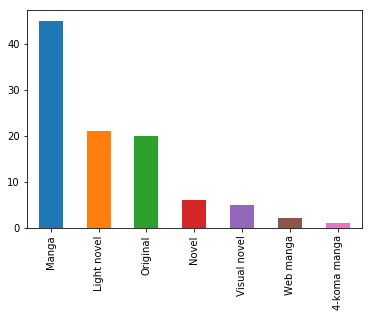

In [8]:
# Análise sobre fonte de animes populares
top_popular = popular.head(100)
top_popular['source'].value_counts().plot.bar()

### Gênero dos usuários
Como esperado, existe uma grande predominância de espectadores masculinos.

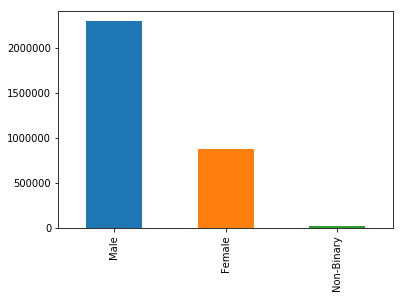

In [9]:
# Análise sobre gênero dos espectadores de animes populares
merged['gender'].value_counts().plot.bar()

### País dos espectadores
Organizando por animes populares, queremos saber de onde vêm os espectadores. Espera-se que países com melhor índice de IDH estejam presentes em primeiro lugar.

In [13]:
# Análise sobre localização dos usuários

# Ordenando por popularidade
merged_popular = merged.sort_values('popularity')

In [15]:
# Removendo linhas sem informação de país 
merged_popular = merged_popular[merged_popular.country != 'no data']

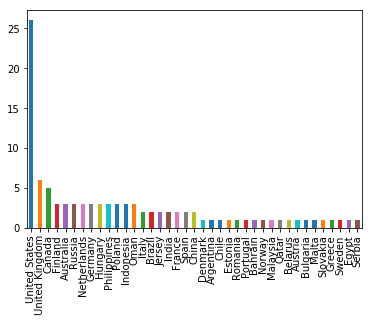

In [18]:
merged_popular['country'].head(100).value_counts().plot.bar()